<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Opening_and_closing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing libraries

import cv2
import numpy
from matplotlib import pyplot as plt

# FOR THE OPENING PROCESS, THE IMAGE IS FIRST EROTED AN AMOUNT N OF TIMES AND AFTER IT DILATION AN AMOUNT ALSO
# N OF TIMES,
# TO THE CLOSING PROCESS THE OTHER WAY IS DONE

# DEFINE THE VARIABLE imagem LIKE A NDARRAY (N-DIMENSIONAL ARRAY) FROM UPLOADING THE CONTAINED IMAGE
# IN THE FILE "imagem_30.jpg" IN MODE "grayscale"

imagem = cv2.imread("imagem_30.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
#### VARIABLE FOR THE EROSION PROCESS

# Creating a variable for undergo the erosion process
# Note that borders have been added to the images and all pixels have an intensity of 255,
# since the technique looks for the lowest pixels intensities values scanning the image,
# and, this way, edge values will not influence

imagem_transformada = 255*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

In [ ]:
#### VARIABLE FOR THE DILATION PROCESS

# Creating a variable for undergo the dilation process
# Note that borders have been added to the images and all pixels have an intensity of 0,
# since the technique looks for the bigger pixels intensities values scanning the image,
# and, this way, edge values will not influence

imagem_transformada = 0*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

In [5]:
# Assigns the content of the imagem variable to the internal part of the imagem_transformada variable

imagem_transformada[1:-1,1:-1] = imagem

# Create a variable for store the image after applying the technique

imagem_copia_2 = imagem_transformada.copy()

# Creation of the mask to scroll through the image, observe that all its elements are equal to 1,
# to select the smallest element(erosion)/bigger element(dilation)
# from the region in which it is in the image during the scan

Mascara = numpy.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

# Variable that store the number of executions of the technique

N = 1

# Variable that will be increased until the desired number of executions is reached

i=0

# List that stores the values of the multiplications performed between the mask elements
# and the pixels intensity values of the image

lista_de_produtos = []

In [6]:
# Creating the loop to execute the technique

while (i < N): # Check the number of executions of the technique
    # Scan the columns, observe the start and the end of the scan interval and try to understand why
    for y in range(1, imagem_transformada.shape[1]-1):
        # Scan the rows, observe the start and the end of the scan interval and try to understand why
        for x in range(1, imagem_transformada.shape[0]-1):

            # Loops for performing the multiplication between mask elements and pixels intensities

            for y_mascara in range(-1, 2):
                for x_mascara in range(-1, 2):
                    # Selects the pixel intensity that will be multiplied by its position
                    a = (imagem_copia_2[x + x_mascara, y + y_mascara])
                    # Selects the corresponding element of the mask in relation to the pixel to perform
                    # the multiplication
                    b = (Mascara[x_mascara+1, y_mascara+1])
                    # Stores the multiplication between the mask element and the intensity of the selected pixel
                    lista_de_produtos.append(a*b)
            ## Assigns to the current pixel of the scan the smallest value found in the multiplication between the
            ## elements of the mask and the intensities of the pixels around the current puxel, including it
            # - Erosion
            imagem_transformada[x,y] = min(lista_de_produtos)

            ## Assigns to the current pixel of the scan the HIGHEST value found in the multiplication between the
            ## elements  of the mask and the intensities of the pixels around the current puxel, including it
            # - Dilation
            # imagem_transformada[x, y] = max(lista_de_produtos)

            lista_de_produtos = [] # Empty the lista_de_produtos variable for the next iteration
    # Storage of the erosion/dilation process result, so that it can be used in the next execution
    imagem_copia_2 = imagem_transformada.copy()
    i = i + 1 # Increase in the number of executions

# Assigns to the imagem_copia_2 variable only the eroded part, without the added edges

imagem_copia_2 = imagem_copia_2[1:-1,1:-1]

In [7]:
# Zeroing the variable that will be increased until reaching the desired number of executions for applying a erosion or dilation technique

i = 0

In [ ]:
# Creation of a variable to undergo the erosion process
# Note that borders were added to the images and all pixels have intensity 255,
# as the technique look for the lowest pixel intensity values while scanning the image, and, therefore
# the borders values will not influence

imagem_transformada_2 = 255*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

In [8]:
# Creation of a variable to undergo the dilation process
# Note that borders were added to the images and all pixels have intensity 0,
# as the technique look for the highest pixel intensity values while scanning the image, and, therefore
# the borders values will not influence

imagem_transformada_2 = 0*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

In [9]:
# Assigns the content of variable imagem_transformada to the internal part of the variable imagem_transformada_2, after going through the erosion or dilation technique N times

imagem_transformada_2[1:-1,1:-1] = imagem_transformada[1:-1,1:-1]

# Update of the variable that stores the image that will going through the opening or closing technique

imagem_copia_2 = imagem_transformada_2.copy()

In [10]:
# Creating the loop to execute the technique

while (i < N): # Check the number of executions of the technique
    # Scan the columns, observe the start and the end of the scan interval and try to understand why
    for y in range(1, imagem_transformada.shape[1]-1):
        # Scan the rows, observe the start and the end of the scan interval and try to understand why
        for x in range(1, imagem_transformada.shape[0]-1):

            # Loops for performing the multiplication between mask elements and pixels intensities

            for y_mascara in range(-1, 2):
                for x_mascara in range(-1, 2):
                    # Selects the pixel intensity that will be multiplied by its position
                    a = (imagem_copia_2[x + x_mascara, y + y_mascara])
                    # Selects the corresponding element of the mask in relation to the pixel to perform
                    # the multiplication
                    b = (Mascara[x_mascara+1, y_mascara+1])
                    # Stores the multiplication between the mask element and the intensity of the selected pixel
                    lista_de_produtos.append(a*b)
            # ## Assigns to the current pixel of the scan the smallest value found in the multiplication between the
            # ## elements of the mask and the intensities of the pixels around the current puxel, including it
            # # - Erosion
            # imagem_transformada[x,y] = min(lista_de_produtos)

            # Assigns to the current pixel of the scan the HIGHEST value found in the multiplication between the
            # elements  of the mask and the intensities of the pixels around the current puxel, including it
            # - Dilation
            imagem_transformada[x, y] = max(lista_de_produtos)

            lista_de_produtos = [] # Empty the lista_de_produtos variable for the next iteration
    # Storage of the erosion/dilation process result, so that it can be used in the next execution
    imagem_copia_2 = imagem_transformada.copy()
    i = i + 1 # Increase in the number of executions

# Assigns to the imagem_copia_2 variable only the eroded part, without the added edges

imagem_copia_2 = imagem_copia_2[1:-1,1:-1]

In [11]:
# Carrying out the opening process using a function from the opencv library

imagem_transformada_biblioteca = cv2.morphologyEx(imagem,cv2.MORPH_OPEN,Mascara,iterations=N)

In [ ]:
# Carrying out the closing process using a function from the opencv library

imagem_transformada_biblioteca = cv2.morphologyEx(imagem,cv2.MORPH_CLOSE,Mascara,iterations=N)

In [12]:
# Print the root mean squared error between the image obtained by the implemented code and the
# image obtained by the library function

# Difference between the intensities of the pixels from the image obtained by the implemented code and the
# image obtained by the libary function

Diferenca_imagens = numpy.subtract(imagem_copia_2,imagem_transformada_biblioteca)

Soma_elementos = numpy.sum(Diferenca_imagens) # Sum of the differences of the intensities

# Calculate the average of the sum of the differences of the intensities

Media = Soma_elementos/(imagem_copia_2.shape[0]*imagem_copia_2.shape[1])

Raiz = numpy.sqrt(Media) # Calculate the root

print(Raiz)

0.0


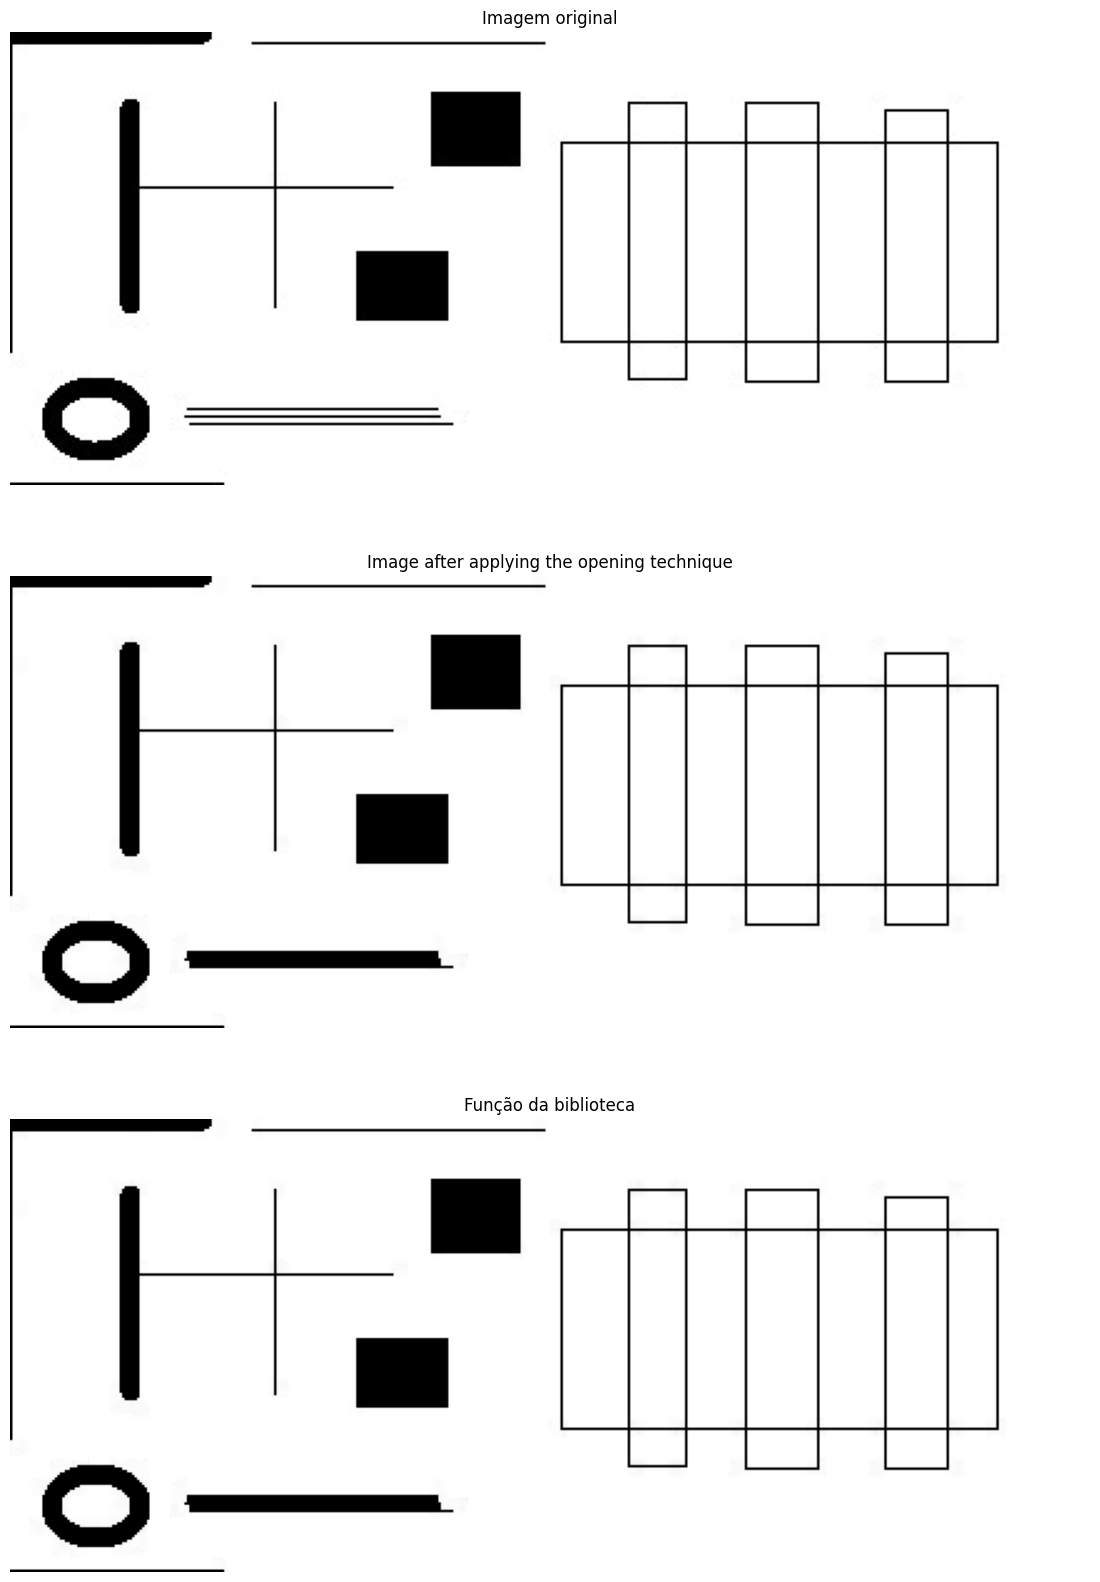

In [13]:
# SET FIGURE SIZE IN INCHES, ADJUSTING THE DISPLAYED WIDGHT AND THE HEIGHT

figura = plt.figure(figsize=(20, 20))

# DEFINING THE DISPLAY FORM, WITH THREE IMAGES, ONE ON TOP OF THE OTHER

linhas = 3
colunas = 1

# CREATING THE FIRST SUBPLOT TO BE DISPLAYED

figura.add_subplot(linhas, colunas, 1)  # SUBPLOT POSITION
# Defines the data that will be displayed as an image, and in this case, a monochrome image due to cmap='gray'
plt.imshow(imagem, cmap = 'gray')
# Desables values displayed on numerics axes
plt.axis('off')
plt.title("Imagem original") # Image Title

# CREATING THE SECOND SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 2)
plt.imshow(imagem_copia_2, cmap = 'gray')
plt.axis('off')
plt.title("Image after applying the opening technique") # For the opening process
# plt.title("Image after applying the closing technique") # For the closing process

# CREATING THE THIRD SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 3)
plt.imshow(imagem_transformada_biblioteca, cmap = 'gray')
plt.axis('off')
plt.title("Função da biblioteca")

# SUBPLOTS DISPLAY

plt.show()